In [1]:
# Necessary imports
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import glob
import re

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

print('Libraries imported')

Libraries imported


In [2]:
path = r'C:/Metis_Bootcamp/Regression_project/data/joined-full-data//' # data path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    data = pd.read_csv(filename, index_col=0, header=0)
    li.append(data)

df = pd.concat(li, axis=0, ignore_index=True)

print(df.shape)

df.head()

(125034, 15)


,Name,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Entertainment,Safety,Price
0,2020 BMW 330 i xDrive,"24,371","Brooklyn, NY 11203",3.5,Gasoline,25,34,AWD,2.0L I4 16V GDI DOHC Turbo,Jet Black,Black,8-Speed Automatic,"['Bluetooth', 'Apple CarPlay/Android Auto']","['Backup Camera', 'Brake Assist', 'Stability C...","$29,893"
1,2015 Audi A6 2.0T Premium Plus,"89,351","Brooklyn, NY 11207",2.2,Gasoline,20,29,AWD,2.0L I4 16V GDI DOHC Turbo,Gray,-1,8-Speed Automatic,"['Bluetooth', 'Premium Sound System']","['Brake Assist', 'Stability Control']","$16,995"
2,2018 Toyota RAV4 Limited,"11,863","Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Black,Black,6-Speed Automatic,"['Bluetooth', 'Premium Sound System']","['Backup Camera', 'Brake Assist', 'Stability C...","$26,225"
3,2018 Toyota RAV4 Limited,"17,501","Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Gray,-1,6-Speed Automatic,"['Bluetooth', 'Premium Sound System']","['Backup Camera', 'Brake Assist', 'Stability C...","$25,903"
4,2019 Honda CR-V EX-L,"19,241","Brooklyn, NY 11210",3.5,Gasoline,27,33,AWD,1.5L I4 16V GDI DOHC Turbo,Gray,-1,Automatic CVT,"['Bluetooth', 'Apple CarPlay/Android Auto']","['Backup Camera', 'Brake Assist', 'Stability C...","$28,145"


In [43]:
def model_year_extractor(name):
    
    name_year = name.replace('Certified ','').strip()
    
    year = int(name_year.split(' ')[0])
    
    return year

In [44]:
df['Model Year'] = df['Name'].apply(model_year_extractor)

In [45]:
df = df[df['Model Year'] > 2000]
df['Model Year'].value_counts().sort_index()

2001      104
2002      137
2003      180
2004      230
2005      323
2006      472
2007      593
2008      649
2009      487
2010      686
2011     1010
2012     1651
2013     2746
2014     3190
2015     4404
2016     5312
2017    13857
2018    31180
2019    14327
2020    13849
2021     5623
2022       20
Name: Model Year, dtype: int64

In [46]:
df.shape

(101030, 16)

In [47]:
def make_extractor(name):
    
    if 'Land' in name:
        return 'Land Rover'
    
    elif 'Alfa' in name:
        return 'Alfa Romeo'
    
    elif 'MINI' in name:
        return 'MINI Cooper'
    
    elif 'Aston' in name:
        return 'Aston Martin'
    
    else:
        return name.split(' ')[2]

In [48]:
def car_model_extractor(name):
    try:
        return name.split(' ')[3]
    except:
        return name.split(' ')[2]

In [49]:
df['Car Model'] = df['Name'].apply(car_model_extractor)

In [50]:
df['Car Model'].value_counts().head(20)

F-150         2751
Grand         2426
Silverado     1865
Camry         1678
RAV4          1670
1500          1605
Rover         1565
Wrangler      1490
CR-V          1490
Rogue         1430
Highlander    1365
Explorer      1308
Accord        1300
Escape        1268
Civic         1099
Equinox       1076
E             1076
C             1042
Corolla       1041
Sierra        1035
Name: Car Model, dtype: int64

In [51]:
other_model = df['Car Model'].value_counts()[df['Car Model'].value_counts() <= 5].index
df['Car Model'] = df['Car Model'].replace(other_model, 'Other')
df['Car Model'].value_counts()

F-150        2751
Grand        2426
Silverado    1865
Camry        1678
RAV4         1670
             ... 
570S            6
Gallardo        6
M37             6
CT4             6
SS              6
Name: Car Model, Length: 430, dtype: int64

In [52]:
df['Make'] = df['Name'].apply(make_extractor)

In [53]:
df['Make'].value_counts()

Ford             10281
Toyota            9258
Chevrolet         7716
Mercedes-Benz     6380
BMW               6042
Honda             5886
Jeep              5869
Nissan            4751
Lexus             3833
Audi              3771
GMC               3273
Hyundai           3118
Volkswagen        2988
Subaru            2550
Dodge             2510
Kia               2383
Acura             2326
RAM               2076
INFINITI          1986
Mazda             1944
Cadillac          1922
Land Rover        1594
Lincoln           1206
Volvo             1095
Buick              973
Porsche            907
Chrysler           858
Alfa Romeo         532
Jaguar             526
MINI Cooper        452
Mitsubishi         446
Tesla              392
Maserati           309
Genesis            271
FIAT               146
Bentley             73
Scion               69
Pontiac             51
Ferrari             49
Lamborghini         40
Aston Martin        38
Rolls-Royce         31
Hummer              23
Saturn     

In [54]:
other_make = df['Make'].value_counts()[df['Make'].value_counts() <= 20].index
df['Make'] = df['Make'].replace(other_make, 'Other')
df['Make'].value_counts()

Ford             10281
Toyota            9258
Chevrolet         7716
Mercedes-Benz     6380
BMW               6042
Honda             5886
Jeep              5869
Nissan            4751
Lexus             3833
Audi              3771
GMC               3273
Hyundai           3118
Volkswagen        2988
Subaru            2550
Dodge             2510
Kia               2383
Acura             2326
RAM               2076
INFINITI          1986
Mazda             1944
Cadillac          1922
Land Rover        1594
Lincoln           1206
Volvo             1095
Buick              973
Porsche            907
Chrysler           858
Alfa Romeo         532
Jaguar             526
MINI Cooper        452
Mitsubishi         446
Tesla              392
Maserati           309
Genesis            271
FIAT               146
Bentley             73
Scion               69
Other               64
Pontiac             51
Ferrari             49
Lamborghini         40
Aston Martin        38
Rolls-Royce         31
Hummer     

In [55]:
def mileage_to_int(mileage):
    
    return int(mileage.replace(',',''))

def price_to_int(price):
    
    return int(price.replace('$','').replace(',',''))

In [56]:
#Converse mileage and price to int

df['Mileage'] = df['Mileage'].apply(mileage_to_int)

df['Price'] = df['Price'].apply(price_to_int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101030 entries, 0 to 101421
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Name            101030 non-null  object 
 1   Mileage         101030 non-null  int64  
 2   Address         101030 non-null  object 
 3   Rating          101012 non-null  float64
 4   Fuel Type       101030 non-null  object 
 5   City MPG        101030 non-null  int64  
 6   Highway MPG     101030 non-null  int64  
 7   Drivetrain      101030 non-null  object 
 8   Engine          101030 non-null  object 
 9   Exterior Color  101030 non-null  object 
 10  Interior Color  101030 non-null  object 
 11  Transmission    101030 non-null  object 
 12  Entertainment   101030 non-null  object 
 13  Safety          101030 non-null  object 
 14  Price           101030 non-null  int64  
 15  Model Year      101030 non-null  int64  
 16  Car Model       101030 non-null  object 
 17  Make      

In [57]:
df.Price.isna().sum()

0

In [59]:
df.Price.describe()

count    1.010300e+05
mean     2.986343e+04
std      1.900575e+04
min      1.000000e+03
25%      1.959125e+04
50%      2.699000e+04
75%      3.607800e+04
max      1.450000e+06
Name: Price, dtype: float64

In [60]:
def num_ent_fea(entertainment):
    
    if '-1' in entertainment.lower():
        return None
    else:
        return len(entertainment.split(','))

def num_safe_fea(safety):
    
    if '-1' in safety.lower():
        return None
    else:
        return len(safety.split(','))

In [61]:
df['Entertainment'] = df['Entertainment'].apply(num_ent_fea)
df['Safety'] = df['Safety'].apply(num_safe_fea)

In [62]:
df.rename(columns={'Entertainment': 'Num_ent_features', 'Safety': 'Num_safe_features'}, inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101030 entries, 0 to 101421
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               101030 non-null  object 
 1   Mileage            101030 non-null  int64  
 2   Address            101030 non-null  object 
 3   Rating             101012 non-null  float64
 4   Fuel Type          101030 non-null  object 
 5   City MPG           101030 non-null  int64  
 6   Highway MPG        101030 non-null  int64  
 7   Drivetrain         101030 non-null  object 
 8   Engine             101030 non-null  object 
 9   Exterior Color     101030 non-null  object 
 10  Interior Color     101030 non-null  object 
 11  Transmission       101030 non-null  object 
 12  Num_ent_features   95868 non-null   float64
 13  Num_safe_features  99274 non-null   float64
 14  Price              101030 non-null  int64  
 15  Model Year         101030 non-null  int64  
 16  Ca

In [64]:
df.head()

,Name,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Num_ent_features,Num_safe_features,Price,Model Year,Car Model,Make
0,2020 BMW 330 i xDrive,24371,"Brooklyn, NY 11203",3.5,Gasoline,25,34,AWD,2.0L I4 16V GDI DOHC Turbo,Jet Black,Black,8-Speed Automatic,2.0,5.0,29893,2020,330,BMW
1,2015 Audi A6 2.0T Premium Plus,89351,"Brooklyn, NY 11207",2.2,Gasoline,20,29,AWD,2.0L I4 16V GDI DOHC Turbo,Gray,-1,8-Speed Automatic,2.0,2.0,16995,2015,A6,Audi
2,2018 Toyota RAV4 Limited,11863,"Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Black,Black,6-Speed Automatic,2.0,6.0,26225,2018,RAV4,Toyota
3,2018 Toyota RAV4 Limited,17501,"Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Gray,-1,6-Speed Automatic,2.0,6.0,25903,2018,RAV4,Toyota
4,2019 Honda CR-V EX-L,19241,"Brooklyn, NY 11210",3.5,Gasoline,27,33,AWD,1.5L I4 16V GDI DOHC Turbo,Gray,-1,Automatic CVT,2.0,6.0,28145,2019,CR-V,Honda


In [65]:
df.describe()

,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Price,Model Year
count,101030.000000,101012.00000,101030.000000,101030.000000,95868.000000,99274.000000,1.010300e+05,101030.000000
mean,40763.945125,4.26106,21.124894,29.420974,1.809279,3.628543,2.986343e+04,2017.358488
std,35601.424603,0.74488,12.194715,24.801680,0.714060,1.369554,1.900575e+04,2.944108
min,1.000000,1.00000,-1.000000,-1.000000,1.000000,1.000000,1.000000e+03,2001.000000
25%,18627.250000,4.10000,17.000000,24.000000,1.000000,3.000000,1.959125e+04,2017.000000
50%,31239.000000,4.50000,20.000000,28.000000,2.000000,3.000000,2.699000e+04,2018.000000
75%,50083.000000,4.80000,24.000000,32.000000,2.000000,5.000000,3.607800e+04,2019.000000
max,533752.000000,5.00000,224.000000,414.000000,4.000000,7.000000,1.450000e+06,2022.000000


In [66]:
def define_transmission(transmission):
    
    if 'automatic' in transmission.lower():
        return 'Automatic'
    
    elif 'manual' in transmission.lower():
        return 'Manual'
    
    else:
        return None

In [67]:
df['Transmission'] = df['Transmission'].apply(define_transmission)

In [68]:
df['Transmission'].value_counts()

Automatic    97639
Manual        1963
Name: Transmission, dtype: int64

In [69]:
df['Transmission'].isna().sum()

1428

In [70]:
df.head()

,Name,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Num_ent_features,Num_safe_features,Price,Model Year,Car Model,Make
0,2020 BMW 330 i xDrive,24371,"Brooklyn, NY 11203",3.5,Gasoline,25,34,AWD,2.0L I4 16V GDI DOHC Turbo,Jet Black,Black,Automatic,2.0,5.0,29893,2020,330,BMW
1,2015 Audi A6 2.0T Premium Plus,89351,"Brooklyn, NY 11207",2.2,Gasoline,20,29,AWD,2.0L I4 16V GDI DOHC Turbo,Gray,-1,Automatic,2.0,2.0,16995,2015,A6,Audi
2,2018 Toyota RAV4 Limited,11863,"Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Black,Black,Automatic,2.0,6.0,26225,2018,RAV4,Toyota
3,2018 Toyota RAV4 Limited,17501,"Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Gray,-1,Automatic,2.0,6.0,25903,2018,RAV4,Toyota
4,2019 Honda CR-V EX-L,19241,"Brooklyn, NY 11210",3.5,Gasoline,27,33,AWD,1.5L I4 16V GDI DOHC Turbo,Gray,-1,Automatic,2.0,6.0,28145,2019,CR-V,Honda


In [71]:
df.Engine.value_counts().head(50)

 2.0L I4 16V GDI DOHC Turbo                          12504
 1.5L I4 16V GDI DOHC Turbo                           4259
 3.6L V6 24V MPFI DOHC                                4237
 3.6L V6 24V GDI DOHC                                 3215
 3.5L V6 24V MPFI DOHC                                2910
 5.3L V8 16V GDI OHV                                  2863
 2.4L I4 16V GDI DOHC                                 2753
 2.5L I4 16V MPFI DOHC                                2732
 2.0L I4 16V MPFI DOHC                                2051
 3.5L V6 24V PDI DOHC                                 2015
 3.5L V6 24V GDI SOHC                                 1900
 3.5L V6 24V GDI DOHC                                 1893
 3.0L V6 24V GDI DOHC Twin Turbo                      1847
 2.5L I4 16V GDI DOHC                                 1681
 5.7L V8 16V MPFI OHV                                 1584
 2.5L I4 16V PDI DOHC                                 1501
 1.8L I4 16V MPFI DOHC                                14

In [72]:
def define_engine(engine):
    
    if '-1' in engine.lower():
        return None
    
    elif 'intercooled' in engine.lower() or 'regular' in engine.lower() or 'electric' in engine.lower():
        return engine.strip()
    
    else:
        return engine.strip().split(' ')[0]

In [73]:
df['Engine'] = df['Engine'].apply(define_engine)

In [74]:
other_engine = df['Engine'].value_counts()[df['Engine'].value_counts() <= df.shape[0]*0.001].index
df['Engine'] = df['Engine'].replace(other_engine, 'Other')
df['Engine'].value_counts()

2.0L                                                       20223
3.5L                                                       11778
2.5L                                                        8682
3.6L                                                        8412
3.0L                                                        5573
2.4L                                                        5134
1.5L                                                        5007
Other                                                       3213
5.3L                                                        3179
1.8L                                                        2614
5.7L                                                        2134
1.4L                                                        1685
6.2L                                                        1501
1.6L                                                        1383
4.0L                                                        1240
5.0L                     

In [75]:
df.Engine.isna().sum()

58

In [76]:
df['Exterior Color'].value_counts().head(30)

 Black                                 8915
 White                                 6540
 Gray                                  4056
 Silver                                2985
 Blue                                  2014
 Summit White                          1964
 Bright White Clearcoat                1416
 Red                                   1346
 Granite Crystal Clearcoat Metallic    1117
 Oxford White                          1075
-1                                     1020
 Crystal Black Pearl                   1017
 Gun Metallic                           971
 Polar White                            928
 Super White                            887
 Alpine White                           882
 Diamond Black                          852
 Silver Ice Metallic                    841
 Shadow Black                           836
 Modern Steel Metallic                  776
 Billet Silver Metallic Clearcoat       698
 Black Sapphire Metallic                671
 Midnight Black Metallic        

In [77]:
def define_exterior_color(exterior_color):
    
    if 'black' in exterior_color.lower():
        return 'Black'
    
    elif 'white' in exterior_color.lower():
        return 'White'
    
    elif 'gray' in exterior_color.lower():
        return 'Gray'
    
    elif 'silver' in exterior_color.lower():
        return 'Silver'
    
    elif 'blue' in exterior_color.lower():
        return 'Blue'
    
    elif 'red' in exterior_color.lower():
        return 'Red'
    
    elif 'metallic' in exterior_color.lower():
        return 'Metallic'
    
    elif '-1' in exterior_color.lower():
        return np.nan
    
    else:
        return 'Other'

In [78]:
df['Exterior Color'] = df['Exterior Color'].apply(define_exterior_color)

In [79]:
df['Exterior Color'].value_counts()

Black       23581
White       22873
Silver      12432
Gray        10525
Blue         8672
Other        8145
Metallic     7650
Red          6132
Name: Exterior Color, dtype: int64

In [80]:
df['Exterior Color'].isna().sum()

1020

In [81]:
df['Interior Color'].value_counts().head(30)

 Black                  37241
-1                      12750
 Gray                    6000
 Jet Black               5803
 Ebony                   4281
 Charcoal                3082
 Beige                   2134
 Graphite                1930
 Charcoal Black          1302
 Titan Black             1259
 Ash                      968
 Ivory                    691
 Tan                      688
 Parchment                675
 Brown                    621
 Ebony Black              588
 Medium Earth Gray        567
 Red                      528
 Light Gray               357
 Sport                    351
 Diesel Gray / Black      347
 Mocha                    326
 Medium Ash Gray          289
 Ebony / Ebony            277
 Carbon Black             272
 Almond                   272
 Medium Light Stone       263
 Cocoa / Dune             255
 Black / Red              251
 Silk Beige / Black       244
Name: Interior Color, dtype: int64

In [82]:
def define_interior_color(interior_color):

    if 'ebony' in interior_color.lower() or 'ebony black' in interior_color.lower():
        return 'Ebony'
    
    elif 'black' in interior_color.lower():
        return 'Black'
    
    elif 'gray' in interior_color.lower():
        return 'Gray'
    
    elif 'charcoal' in interior_color.lower():
        return 'Charcoal'
    
    elif 'graphite' in interior_color.lower():
        return 'Graphite'
    
    elif '-1' in interior_color.lower():
        return np.nan
    
    else:
        return 'Other'

In [83]:
df['Interior Color'] = df['Interior Color'].apply(define_interior_color)

In [84]:
df['Interior Color'].value_counts()

Black       50276
Other       17819
Gray         9254
Ebony        5713
Charcoal     3175
Graphite     2043
Name: Interior Color, dtype: int64

In [85]:
def define_drivetrain(drivetrain):
    
    if 'fwd' in drivetrain.lower() or 'front wheel drive' in drivetrain.lower() or 'front-wheel drive' in drivetrain.lower():
        return 'FWD'
    
    elif 'awd' in drivetrain.lower() or 'all wheel drive' in drivetrain.lower() or 'all-wheel drive' in drivetrain.lower():
        return 'AWD'
    
    elif '4wd' in drivetrain.lower() or 'four wheel drive' in drivetrain.lower() or 'four-wheel drive' in drivetrain.lower():
        return '4WD'
    
    elif 'rwd' in drivetrain.lower() or 'rear wheel drive' in drivetrain.lower() or 'rear-wheel drive' in drivetrain.lower():
        return 'RWD'
    
    else:
        return np.nan

In [86]:
df['Drivetrain'] = df['Drivetrain'].apply(define_drivetrain)

In [87]:
df['Drivetrain'].value_counts()

AWD    36426
FWD    32272
4WD    20079
RWD    11980
Name: Drivetrain, dtype: int64

In [88]:
      
df['City MPG'] = df['City MPG'].apply(lambda x: np.nan if x == -1 else x)

df['City MPG'].fillna(df['City MPG'].median(), inplace=True)

df['Highway MPG'] = df['Highway MPG'].apply(lambda x: np.nan if x == -1 else x)

df['Highway MPG'].fillna(df['Highway MPG'].median(), inplace=True)

In [89]:
df.isna().sum()

Name                     0
Mileage                  0
Address                  0
Rating                  18
Fuel Type                0
City MPG                 0
Highway MPG              0
Drivetrain             273
Engine                  58
Exterior Color        1020
Interior Color       12750
Transmission          1428
Num_ent_features      5162
Num_safe_features     1756
Price                    0
Model Year               0
Car Model                0
Make                     0
dtype: int64

In [90]:
print('Shape of dataframe before dropping rows that contain null values: {}'.format(df.shape[0]))
df.dropna(inplace=True)
print('Shape of dataframe after dropping rows that contain null values: {}'.format(df.shape[0]))

Shape of dataframe before dropping rows that contain null values: 101030
Shape of dataframe after dropping rows that contain null values: 82457


In [91]:
df.describe()

,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Price,Model Year
count,82457.000000,82457.000000,82457.000000,82457.000000,82457.000000,82457.000000,8.245700e+04,82457.000000
mean,37270.822792,4.297086,22.246941,30.522054,1.834204,3.711207,3.070076e+04,2017.724802
std,30657.380207,0.719660,10.816386,21.825078,0.716735,1.339647,1.958638e+04,2.339692
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.500000e+03,2001.000000
25%,17610.000000,4.100000,18.000000,25.000000,1.000000,3.000000,1.999500e+04,2017.000000
50%,30219.000000,4.500000,21.000000,28.000000,2.000000,3.000000,2.742400e+04,2018.000000
75%,46820.000000,4.800000,24.000000,32.000000,2.000000,5.000000,3.698800e+04,2019.000000
max,492592.000000,5.000000,204.000000,414.000000,4.000000,7.000000,1.450000e+06,2022.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82457 entries, 0 to 101421
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               82457 non-null  object 
 1   Mileage            82457 non-null  int64  
 2   Address            82457 non-null  object 
 3   Rating             82457 non-null  float64
 4   Fuel Type          82457 non-null  object 
 5   City MPG           82457 non-null  float64
 6   Highway MPG        82457 non-null  float64
 7   Drivetrain         82457 non-null  object 
 8   Engine             82457 non-null  object 
 9   Exterior Color     82457 non-null  object 
 10  Interior Color     82457 non-null  object 
 11  Transmission       82457 non-null  object 
 12  Num_ent_features   82457 non-null  float64
 13  Num_safe_features  82457 non-null  float64
 14  Price              82457 non-null  int64  
 15  Model Year         82457 non-null  int64  
 16  Car Model          82

<AxesSubplot:xlabel='Price', ylabel='Density'>

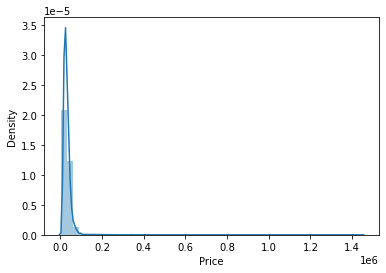

In [102]:
#Check price distribution
sns.distplot(df.Price)

In [103]:
df = df[df.Price <= (df.Price.mean() + 3 * df.Price.std())]

<AxesSubplot:xlabel='Price', ylabel='Density'>

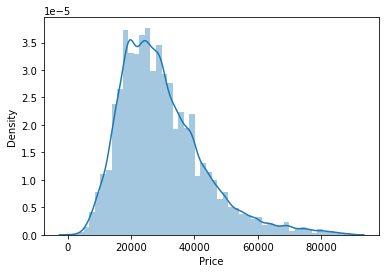

In [104]:
sns.distplot(df.Price)

In [107]:
df.describe()

,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Price,Model Year
count,81752.000000,81752.000000,81752.000000,81752.000000,81752.000000,81752.000000,81752.000000,81752.000000
mean,37498.559106,4.295914,22.297595,30.398449,1.829912,3.715885,29640.320029,2017.718869
std,30670.831325,0.720447,10.814289,21.166948,0.715178,1.340327,13319.046213,2.338714
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1500.000000,2001.000000
25%,17850.000000,4.100000,18.000000,25.000000,1.000000,3.000000,19995.000000,2017.000000
50%,30351.000000,4.500000,21.000000,28.000000,2.000000,3.000000,27177.000000,2018.000000
75%,47013.250000,4.800000,24.000000,32.000000,2.000000,5.000000,36590.000000,2019.000000
max,492592.000000,5.000000,204.000000,414.000000,4.000000,7.000000,89337.000000,2022.000000


In [110]:
df.duplicated().sum()

15956

In [112]:
df.drop_duplicates(inplace=True)

In [113]:
df.to_csv('cleaned_data.csv')